# Name: Gaurav Rajesh Makasare
# USCID: 7559721394
# email: makasare@usc.edu

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from scipy.spatial.distance import hamming
import warnings
warnings.filterwarnings('ignore')

# (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [3]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
#referred https://towardsdatascience.com/how-to-split-a-dataframe-into-train-and-test-set-with-python-eaa1630ca7b3
traindata, testdata = train_test_split(df, test_size=0.3, random_state=200, shuffle=True)

In [5]:
traindata

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
955,1.0,0.331864,-0.127048,0.151166,0.353237,0.154796,-0.113095,-0.020795,0.165342,0.124538,...,-0.112113,-0.000060,0.012309,-0.048583,-0.091919,0.007747,Dendrobatidae,Ameerega,Ameeregatrivittata,11
289,1.0,0.186151,-0.104279,0.110313,0.359544,0.240316,0.000251,-0.021573,0.103022,0.012273,...,-0.284976,-0.182422,0.121780,0.243282,0.060211,-0.107691,Leptodactylidae,Adenomera,AdenomeraAndre,7
2292,1.0,0.053211,0.023168,0.564388,0.277555,-0.014813,-0.251973,-0.011704,0.225531,0.069873,...,0.239956,-0.025565,-0.151613,-0.128685,0.138554,0.203218,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,18
6640,1.0,0.430493,0.780517,0.184071,-0.182634,0.304560,0.177008,-0.195103,0.127948,0.234626,...,0.112661,-0.049856,-0.031988,0.053673,0.009977,-0.036831,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,46
6186,1.0,0.722722,0.487404,0.234854,-0.005108,0.221692,0.071199,-0.022700,0.180188,0.129845,...,-0.028589,0.001775,0.037913,-0.071512,-0.006714,0.041393,Hylidae,Hypsiboas,HypsiboasCordobae,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,1.0,0.359253,0.184376,0.551780,0.161344,-0.038295,-0.154099,0.091402,0.286419,0.069743,...,0.141007,0.049128,-0.055475,-0.166848,-0.018739,0.173153,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,20
5956,1.0,0.056584,0.404983,0.357513,0.182499,0.255346,0.120189,-0.164769,-0.038981,0.079540,...,0.127632,0.030930,-0.023085,0.025457,-0.028528,-0.001031,Hylidae,Hypsiboas,HypsiboasCordobae,41
784,1.0,0.096090,0.049396,0.372665,0.316052,0.224246,-0.110088,-0.170532,0.110709,0.209299,...,-0.229211,-0.117848,0.061621,0.064964,0.039030,-0.037281,Dendrobatidae,Ameerega,Ameeregatrivittata,10
4713,1.0,0.140983,0.205269,0.559442,0.250732,-0.019940,-0.132835,-0.051244,0.214492,0.198192,...,0.045600,0.102103,0.025551,-0.046166,-0.077805,0.008330,Hylidae,Dendropsophus,HylaMinuta,25


In [6]:
testdata

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
4619,1.0,0.136522,0.176800,0.594396,0.278759,0.068208,-0.136657,-0.018653,0.205483,0.034575,...,0.206933,-0.111566,-0.174288,-0.078864,0.137373,0.194845,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,24
1665,1.0,0.179201,0.183438,0.545162,0.213945,0.045863,-0.169907,-0.001025,0.272949,0.091327,...,0.234798,0.096873,-0.110063,-0.209966,-0.024069,0.223128,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
4527,1.0,0.135365,0.219838,0.629231,0.193137,-0.011372,-0.161153,0.020061,0.188710,0.022327,...,0.170531,-0.125255,-0.140687,-0.075376,0.108435,0.200648,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,24
7112,1.0,0.255070,0.544823,0.502460,0.125230,0.028513,-0.020823,0.180905,0.029306,-0.041035,...,-0.011933,0.044691,0.065298,0.017695,-0.022884,-0.017525,Hylidae,Scinax,ScinaxRuber,57
391,1.0,0.489275,0.600218,0.565528,-0.116174,-0.013077,0.393010,0.069403,-0.227819,0.164097,...,0.043645,0.150068,-0.037753,-0.040902,0.061709,-0.005870,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,1.0,0.261969,0.256620,0.579912,0.169191,0.000873,-0.035315,0.070504,0.151574,-0.010936,...,0.077485,-0.089150,-0.048535,-0.036704,0.089174,0.112586,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
6153,1.0,0.152244,0.349389,0.315750,0.129178,0.225980,0.087315,-0.140414,-0.024007,0.096490,...,0.109631,0.021502,0.001080,-0.019986,-0.081467,0.015014,Hylidae,Hypsiboas,HypsiboasCordobae,41
1395,1.0,0.307612,0.276848,0.458430,0.100395,-0.036946,-0.110333,0.099341,0.237189,-0.109538,...,0.139717,-0.073564,-0.120245,-0.030226,0.159053,0.112756,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
7164,1.0,0.357188,0.443967,0.527126,-0.104747,-0.137401,0.176736,0.393415,0.097834,-0.143379,...,-0.029343,-0.102098,0.065378,0.011495,-0.023939,0.126674,Hylidae,Scinax,ScinaxRuber,59


In [7]:
Xtrain = traindata.iloc[0:, 0:22]

In [8]:
Xtest = testdata.iloc[0:, 0:22]

In [9]:
Ytrain = traindata.iloc[0:, 22:25]

In [10]:
Ytest = testdata.iloc[0:, 22:25]

In [11]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(5036, 22)
(2159, 22)
(5036, 3)
(2159, 3)


# (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

# i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

# Ans:  Hamming Score is the fraction of correct predictions considering to the total labels. Hamming loss is the ratio of number of wrong labels to the total labels. Exact match is the percentage of records classified correctly.

# ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [12]:
#referred sklearn documentation and towardsdatascience
print("The predicted parameters are")
model1 = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr')
model1.fit(Xtrain, Ytrain.iloc[:, :1])

The predicted parameters are


SVC(C=1, gamma=1)

In [13]:
print("The predicted parameters are")
model2 = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr')
model2.fit(Xtrain, Ytrain.iloc[:, 1:2])

The predicted parameters are


SVC(C=1, gamma=1)

In [14]:
print("The predicted parameters are")
model3 = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr')
model3.fit(Xtrain, Ytrain.iloc[:, 2:3])

The predicted parameters are


SVC(C=1, gamma=1)

In [15]:
YPRED1 = model1.predict(Xtest)
print(classification_report(Ytest.iloc[:, :1], YPRED1))

                 precision    recall  f1-score   support

      Bufonidae       0.92      0.85      0.88        13
  Dendrobatidae       0.99      0.99      0.99       170
        Hylidae       0.99      0.98      0.99       651
Leptodactylidae       0.99      0.99      0.99      1325

       accuracy                           0.99      2159
      macro avg       0.97      0.95      0.96      2159
   weighted avg       0.99      0.99      0.99      2159



In [16]:
print("The score for first label")
print(accuracy_score(Ytest.iloc[:, :1], YPRED1))

The score for first label
0.9902732746641963


In [17]:
YPRED2 = model2.predict(Xtest)
print(classification_report(Ytest.iloc[:, 1:2], YPRED2))

               precision    recall  f1-score   support

    Adenomera       0.99      1.00      0.99      1243
     Ameerega       0.99      1.00      1.00       170
Dendropsophus       0.97      0.89      0.93        88
    Hypsiboas       0.98      1.00      0.99       485
Leptodactylus       0.99      0.96      0.98        82
Osteocephalus       1.00      0.87      0.93        38
     Rhinella       1.00      0.85      0.92        13
       Scinax       0.97      0.97      0.97        40

     accuracy                           0.99      2159
    macro avg       0.99      0.94      0.96      2159
 weighted avg       0.99      0.99      0.99      2159



In [18]:
print("The score for second label")
print(accuracy_score(Ytest.iloc[:, 1:2], YPRED2))

The score for second label
0.9884205650764243


In [19]:
YPRED3 = model3.predict(Xtest)
print(classification_report(Ytest.iloc[:, 2:3], YPRED3))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.98      1.00      0.99       196
AdenomeraHylaedactylus       1.00      1.00      1.00      1047
    Ameeregatrivittata       0.99      1.00      1.00       170
            HylaMinuta       0.98      0.92      0.95        88
  HypsiboasCinerascens       0.99      1.00      0.99       139
     HypsiboasCordobae       0.99      1.00      1.00       346
   LeptodactylusFuscus       0.99      0.98      0.98        82
 OsteocephalusOophagus       0.97      0.92      0.95        38
     Rhinellagranulosa       1.00      0.85      0.92        13
           ScinaxRuber       0.97      0.97      0.97        40

              accuracy                           0.99      2159
             macro avg       0.99      0.96      0.97      2159
          weighted avg       0.99      0.99      0.99      2159



In [20]:
print("The score for third label")
print(accuracy_score(Ytest.iloc[:, 2:3], YPRED3))

The score for third label
0.9916628068550255


In [21]:
scores1 = cross_val_score(model1, df.iloc[:, 0:22], df.iloc[:, 22:23] , cv=10)
print(scores1)

[0.40416667 0.90138889 0.98333333 0.99166667 0.99027778 0.98748261
 0.99860918 0.99721836 0.99860918 0.60361613]


In [22]:
scores2 = cross_val_score(model2, df.iloc[:, 0:22], df.iloc[:, 23:24] , cv=10)
print(scores2)

[0.55694444 0.96388889 0.97638889 0.99027778 0.98611111 0.97496523
 0.99165508 0.97635605 0.99443672 0.96105702]


In [23]:
scores3 = cross_val_score(model3, df.iloc[:, 0:22], df.iloc[:, 24:25] , cv=10)
print(scores3)

[0.95972222 0.96388889 0.97222222 0.98611111 0.96388889 0.97357441
 0.98609179 0.97774687 0.99026426 0.96244784]


In [24]:
param_grid = {'C': [-3,-2,-1,0,1,2,3,4,5,6], 'gamma': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1],'kernel': ['rbf']}

In [25]:
y1train = Ytrain.iloc[:, :1]
y2train = Ytrain.iloc[:, 1:2]
y3train = Ytrain.iloc[:, 2:3]

y1test = Ytest.iloc[:, :1]
y2test = Ytest.iloc[:, 1:2]
y3test = Ytest.iloc[:, 2:3]

In [26]:
#referred https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
grid1 = GridSearchCV(model1,param_grid,refit=True,verbose=2)
grid1.fit(Xtrain, Ytrain.iloc[:, 0:1])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0

[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   0.3s
[CV] END ...................

[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END .........................C=5, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END ...................

GridSearchCV(estimator=SVC(C=1, gamma=1),
             param_grid={'C': [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf']},
             verbose=2)

In [27]:
print("The predicted parameters for model 1 using cross validation")
print(grid1.best_estimator_)

The predicted parameters for model 1 using cross validation
SVC(C=6, gamma=1)


In [28]:
grid2 = GridSearchCV(model2,param_grid,refit=True,verbose=2)
grid2.fit(Xtrain, y2train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0

[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   0.3s
[CV] END ...................

[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END .........................C=5, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   0.2s
[CV] END ...................

GridSearchCV(estimator=SVC(C=1, gamma=1),
             param_grid={'C': [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf']},
             verbose=2)

In [29]:
print("The predicted parameters for model 2 using cross validation")
print(grid2.best_estimator_)

The predicted parameters for model 2 using cross validation
SVC(C=6, gamma=0.9)


In [30]:
grid3 = GridSearchCV(model3,param_grid,refit=True,verbose=2)
grid3.fit(Xtrain, y3train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0

[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   0.3s
[CV] END ...................

[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END .........................C=5, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.2, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END ...................

GridSearchCV(estimator=SVC(C=1, gamma=1),
             param_grid={'C': [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf']},
             verbose=2)

In [31]:
print("The predicted parameters for model 3 using cross validation")
print(grid3.best_estimator_)

The predicted parameters for model 3 using cross validation
SVC(C=6, gamma=0.9)


In [32]:
#refered https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
#hamming loss
hl = hamming_loss(y1test, YPRED1)
h2 = hamming_loss(y2test, YPRED2)
h3 = hamming_loss(y3test, YPRED3)
print("The Hamming loss for model 1, model 2 and model 3 are: ")



The Hamming loss for model 1, model 2 and model 3 are: 


In [33]:
print(hamming_loss(y1test, YPRED1))

0.009726725335803613


In [34]:
print(hamming_loss(y2test, YPRED2))

0.01157943492357573


In [35]:
print(hamming_loss(y3test, YPRED3))

0.008337193144974525


# iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [36]:
# r1 = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
# r1.fit(Xtrain, y1train)
r1 = Pipeline([('standardscaler', StandardScaler()), ('svc', LinearSVC(penalty="l1", multi_class='ovr', dual=False))])
r1.fit(Xtrain, y1train)
print("The accuracy score for model 1 regularized: ")
r1.score(Xtest, y1test)

The accuracy score for model 1 regularized: 


0.9388605836035201

In [37]:
param_grid = {'svc__C': np.logspace(-3, 6, 5)}
gridCVr1 = GridSearchCV(r1, param_grid, cv=10, n_jobs=-2)
gridCVr1.fit(Xtrain, y1train)

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was 

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/py

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False, penalty='l1'))]),
             n_jobs=-2,
             param_grid={'svc__C': array([1.00000000e-03, 1.77827941e-01, 3.16227766e+01, 5.62341325e+03,
       1.00000000e+06])})

In [38]:
# r2 = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
# r2.fit(Xtrain, y2train)
r2 = Pipeline([('standardscaler', StandardScaler()), ('svc', LinearSVC(penalty="l1", multi_class='ovr', dual=False))])
r2.fit(Xtrain, y2train)
print("The accuracy score for model 2 regularized: ")
r2.score(Xtest, y2test)

The accuracy score for model 2 regularized: 


0.9569245020842982

In [39]:
param_grid = {'svc__C': np.logspace(-3, 6, 5)}
gridCVr2 = GridSearchCV(r2, param_grid, cv=10, n_jobs=-2)
gridCVr2.fit(Xtrain, y2train)

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was 

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/py

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/py

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False, penalty='l1'))]),
             n_jobs=-2,
             param_grid={'svc__C': array([1.00000000e-03, 1.77827941e-01, 3.16227766e+01, 5.62341325e+03,
       1.00000000e+06])})

In [40]:
# r3 = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
# r3.fit(Xtrain, y3train)
r3 = Pipeline([('standardscaler', StandardScaler()), ('svc', LinearSVC(penalty="l1", multi_class='ovr', dual=False))])
r3.fit(Xtrain, y3train)
print("The accuracy score for model 3 regularized: ")
r3.score(Xtest, y3test)

The accuracy score for model 3 regularized: 


0.9583140342751274

In [41]:
param_grid = {'svc__C': np.logspace(-3, 6, 5)}
gridCVr3 = GridSearchCV(r3, param_grid, cv=10, n_jobs=-2)
gridCVr3.fit(Xtrain, y3train)

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was 

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/py

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gauravmakasare/opt/anaconda3/lib/py

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False, penalty='l1'))]),
             n_jobs=-2,
             param_grid={'svc__C': array([1.00000000e-03, 1.77827941e-01, 3.16227766e+01, 5.62341325e+03,
       1.00000000e+06])})

In [42]:
YPREDr1 = r1.predict(Xtest)
print(classification_report(y1test, YPREDr1))

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        13
  Dendrobatidae       0.87      0.89      0.88       170
        Hylidae       0.92      0.90      0.91       651
Leptodactylidae       0.96      0.97      0.96      1325

       accuracy                           0.94      2159
      macro avg       0.69      0.69      0.69      2159
   weighted avg       0.93      0.94      0.94      2159



In [43]:
YPREDr2 = r2.predict(Xtest)
print(classification_report(y2test, YPREDr1))

                 precision    recall  f1-score   support

      Adenomera       0.00      0.00      0.00    1243.0
       Ameerega       0.00      0.00      0.00     170.0
  Dendrobatidae       0.00      0.00      0.00       0.0
  Dendropsophus       0.00      0.00      0.00      88.0
        Hylidae       0.00      0.00      0.00       0.0
      Hypsiboas       0.00      0.00      0.00     485.0
Leptodactylidae       0.00      0.00      0.00       0.0
  Leptodactylus       0.00      0.00      0.00      82.0
  Osteocephalus       0.00      0.00      0.00      38.0
       Rhinella       0.00      0.00      0.00      13.0
         Scinax       0.00      0.00      0.00      40.0

       accuracy                           0.00    2159.0
      macro avg       0.00      0.00      0.00    2159.0
   weighted avg       0.00      0.00      0.00    2159.0



In [44]:
YPREDr3 = r3.predict(Xtest)
print(classification_report(y3test, YPREDr3))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.94      0.96      0.95       196
AdenomeraHylaedactylus       0.99      1.00      0.99      1047
    Ameeregatrivittata       0.94      0.94      0.94       170
            HylaMinuta       0.90      0.78      0.84        88
  HypsiboasCinerascens       0.93      0.94      0.94       139
     HypsiboasCordobae       0.93      0.95      0.94       346
   LeptodactylusFuscus       0.99      0.95      0.97        82
 OsteocephalusOophagus       0.96      0.58      0.72        38
     Rhinellagranulosa       0.67      0.77      0.71        13
           ScinaxRuber       0.93      0.93      0.93        40

              accuracy                           0.96      2159
             macro avg       0.91      0.88      0.89      2159
          weighted avg       0.96      0.96      0.96      2159



In [45]:
# print(accuracy_score(YPREDr1, y1test))
print(r1.score(Xtest,y1test))

0.9388605836035201


In [46]:
#print(accuracy_score(YPREDr2, y2test))
print(r2.score(Xtest,y2test))

0.9569245020842982


In [47]:
#print(accuracy_score(YPREDr3, y3test))
print(r3.score(Xtest,y3test))

0.9583140342751274


In [48]:
scoresr1 = cross_val_score(r1, df.iloc[:, 0:22], df.iloc[:, 22:23] , cv=10)
print(scoresr1)

[0.2875     0.82083333 0.93888889 0.96944444 0.97361111 0.97079277
 0.92072323 0.97913769 0.97218359 0.61891516]


In [49]:
scoresr2 = cross_val_score(r2, df.iloc[:, 0:22], df.iloc[:, 22:23] , cv=10)
print(scoresr2)

[0.2875     0.81944444 0.93888889 0.96944444 0.97361111 0.97079277
 0.92072323 0.97913769 0.97218359 0.61891516]


In [50]:
scoresr3 = cross_val_score(r3, df.iloc[:, 0:22], df.iloc[:, 22:23] , cv=10)
print(scoresr3)

[0.2875     0.81944444 0.93888889 0.96944444 0.97361111 0.97079277
 0.92072323 0.97913769 0.97218359 0.61891516]


In [51]:
print("The predicted value of C after cross validation for regularized model 1")
print(gridCVr1.best_estimator_)

The predicted value of C after cross validation for regularized model 1
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 LinearSVC(C=0.1778279410038923, dual=False, penalty='l1'))])


In [52]:
print("The predicted value of C after cross validation for regularized model 2")
print(gridCVr2.best_estimator_)

The predicted value of C after cross validation for regularized model 2
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 LinearSVC(C=5623.413251903491, dual=False, penalty='l1'))])


In [53]:
print("The predicted value of C after cross validation for regularized model 3")
print(gridCVr3.best_estimator_)

The predicted value of C after cross validation for regularized model 3
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 LinearSVC(C=31.622776601683793, dual=False, penalty='l1'))])


In [54]:
# y_pred1 = best_classifier.predict(stdXtest)
# y_pred2 = best_classifier2.predict(stdXtest)
# y_pred3 = best_classifier3.predict(stdXtest)
print("Values of Penalty for the three labels are as follows: ")
p1 = gridCVr1.best_params_
p2 = gridCVr2.best_params_
p3 = gridCVr3.best_params_
print(p1)
print(p2)
print(p3)

Values of Penalty for the three labels are as follows: 
{'svc__C': 0.1778279410038923}
{'svc__C': 5623.413251903491}
{'svc__C': 31.622776601683793}


In [55]:
r1h = hamming_loss(y1test, YPREDr1)
r2h = hamming_loss(y2test, YPREDr2)
r3h = hamming_loss(y3test, YPREDr3)
print("The Hamming distances for regularized model 1, model 2 and model 3 are: ")
print(r1h)
print(r2h)
print(r3h)

The Hamming distances for regularized model 1, model 2 and model 3 are: 
0.06113941639647985
0.04307549791570171
0.041685965724872626


# iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [56]:
sm = SMOTE(random_state = 0)
smXtrain, smy1train = sm.fit_sample(Xtrain, y1train)
# smXtrain, smy2train = sm.fit_sample(Xtrain, y2train)
# smXtrian, smy3train = sm.fit_sample(Xtrain, y3train)

# smXtest, smy1test = sm.fit_sample(Xtest, y1test)
# smXtest, smy2test = sm.fit_sample(Xtest, y2test)
# smXtest, smy3test = sm.fit_sample(Xtest, y3test)

In [57]:
smXtest, smy1test = sm.fit_sample(Xtest, y1test)
smXtest, smy2test = sm.fit_sample(Xtest, y2test)
smXtest, smy3test = sm.fit_sample(Xtest, y3test)

In [58]:
model1 = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr')
model1.fit(smXtrain, smy1train)
smypred1 = model1.predict(smXtest)
print(smypred1)
# accuracy_score(smy1test, smypred1)

['Leptodactylidae' 'Leptodactylidae' 'Leptodactylidae' ... 'Hylidae'
 'Hylidae' 'Hylidae']


In [59]:
#referred https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
param_grid = {'C': [-3,-2,-1,0,1,2,3,4,5,6], 'gamma': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1],'kernel': ['rbf']}
grid1 = GridSearchCV(model1,param_grid,refit=True,verbose=2)
grid1.fit(smXtrain, smy1train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0

[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   1.0s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.9s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.9s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.9s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.9s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.9s
[CV] END .........................C=1, gamma=0.6, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.6, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.6, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.6, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.6, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.7, kernel=rbf; total time=   0.7s
[CV] END ...................

[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   0.6s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   0.6s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   0.6s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   0.6s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.5s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.5s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.5s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.5s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.5s
[CV] END .........................C=3, gamma=0.7, kernel=rbf; total time=   0.5s
[CV] END .........................C=3, gamma=0.7, kernel=rbf; total time=   0.5s
[CV] END .........................C=3, gamma=0.7, kernel=rbf; total time=   0.5s
[CV] END ...................

[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   0.5s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   0.5s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.7, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.7, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.7, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.7, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, gamma=0.7, kernel=rbf; total time=   0.4s
[CV] END ...................

GridSearchCV(estimator=SVC(C=1, gamma=1),
             param_grid={'C': [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf']},
             verbose=2)

In [60]:
print(grid1.best_estimator_)

SVC(C=6, gamma=1)


In [61]:
print("Accuracy score is : ")
print(grid1.score(smXtest, smypred1))

Accuracy score is : 
0.9900668576886342


In [62]:
smXtrain, smy2train = sm.fit_sample(Xtrain, y2train)
model2 = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr')
model2.fit(smXtrain, smy2train)
smypred2 = model2.predict(smXtest)
print(smypred2)
# accuracy_score(smy1test, smypred1)

['Adenomera' 'Adenomera' 'Adenomera' ... 'Scinax' 'Scinax' 'Scinax']


In [63]:
#referred https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
param_grid = {'C': [-3,-2,-1,0,1,2,3,4,5,6], 'gamma': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1],'kernel': ['rbf']}
grid2 = GridSearchCV(model2,param_grid,refit=True,verbose=2)
grid2.fit(smXtrain, smy2train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0

[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   4.7s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.6s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.6s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.7s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.7s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.7s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.0s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.1s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.1s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.1s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.1s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   2.6s
[CV] END ...................

[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.1s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.1s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.1s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.1s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.7s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.7s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.8s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.8s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.8s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   1.5s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   1.5s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   1.5s
[CV] END ...................

[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   1.6s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   1.7s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.4s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.4s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.4s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.4s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.4s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.2s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.2s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.2s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.2s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.2s
[CV] END ...................

GridSearchCV(estimator=SVC(C=1, gamma=1),
             param_grid={'C': [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf']},
             verbose=2)

In [64]:
print(grid2.best_estimator_)

SVC(C=5, gamma=1)


In [65]:
print("Accuracy score is : ")
print(grid2.score(smXtest, smypred2))

Accuracy score is : 
0.9944603629417383


In [66]:
smXtrain, smy3train = sm.fit_sample(Xtrain, y3train)
model3 = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr')
model3.fit(smXtrain, smy3train)
smypred3 = model3.predict(smXtest)
print(smypred3)
# accuracy_score(smy1test, smypred1)

['AdenomeraHylaedactylus' 'AdenomeraHylaedactylus'
 'AdenomeraHylaedactylus' ... 'ScinaxRuber' 'ScinaxRuber' 'ScinaxRuber']


In [67]:
#referred https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
param_grid = {'C': [-3,-2,-1,0,1,2,3,4,5,6], 'gamma': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1],'kernel': ['rbf']}
grid3 = GridSearchCV(model3,param_grid,refit=True,verbose=2)
grid3.fit(smXtrain, smy3train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-3, gamma=0

[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=-1, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   4.9s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.8s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.9s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.9s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.9s
[CV] END .........................C=1, gamma=0.3, kernel=rbf; total time=   3.9s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.2s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.3s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.3s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.3s
[CV] END .........................C=1, gamma=0.4, kernel=rbf; total time=   3.3s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   2.8s
[CV] END ...................

[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.2s
[CV] END .........................C=3, gamma=0.3, kernel=rbf; total time=   2.2s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.8s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.9s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.9s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.9s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   1.9s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   1.6s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   1.7s
[CV] END .........................C=3, gamma=0.5, kernel=rbf; total time=   1.7s
[CV] END ...................

[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   1.8s
[CV] END .........................C=5, gamma=0.3, kernel=rbf; total time=   1.8s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.5s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.6s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.6s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.5s
[CV] END .........................C=5, gamma=0.4, kernel=rbf; total time=   1.5s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.3s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.3s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.3s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.4s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=   1.4s
[CV] END ...................

GridSearchCV(estimator=SVC(C=1, gamma=1),
             param_grid={'C': [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf']},
             verbose=2)

In [68]:
print(grid3.best_estimator_)

SVC(C=5, gamma=1)


In [69]:
print("Accuracy score is : ")
print(grid3.score(smXtest, smypred3))

Accuracy score is : 
0.9943648519579752


In [70]:
# y_pred1 = best_classifier.predict(stdXtest)
# y_pred2 = best_classifier2.predict(stdXtest)
# y_pred3 = best_classifier3.predict(stdXtest)
print("Values of Penalty for the three labels are as follows: ")
p1 = gridCVr1.best_params_
p2 = gridCVr2.best_params_
p3 = gridCVr3.best_params_
print(p1)
print(p2)
print(p3)

Values of Penalty for the three labels are as follows: 
{'svc__C': 0.1778279410038923}
{'svc__C': 5623.413251903491}
{'svc__C': 31.622776601683793}


# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

# (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

# (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

# (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

In [71]:
X = df.iloc[:, :22]
y = df.iloc[:, 22:25]
c = y.columns
d = []
l = []

In [72]:
#for performing procedure 50 times
for i in range(0, 50):
    predscore = []
    score = {}
    val_label = []
    print()
    print(i+1, ': \n',)
    k = 2
    #Applying K Means using 50 different values of K
    while k < 51:
        kmmodel = KMeans(n_clusters=k, random_state=k)
        kmlabels = kmmodel.fit_predict(X)
        score[silhouette_score(X, kmlabels)] = k
        val_label.append(kmlabels)
        f= k
        predscore.append(silhouette_score(X, kmlabels))
        k += 1
    t = score[max(list(score.keys()))]
    print("Optimum k: ", t)
    #creating a new col to store predicted score
    y['pl'] = val_label[predscore.index(max(predscore))]
    #print(temp)
    print("Majority label are as follows:")
    ll = list(set(y['pl']))
    #print(l1)
    for m in ll:
        t2 = y[y['pl'] == m]
        print("\n")
        print("Group: ", m)
        for p in c:
            t3 = dict()
            g = dict()
            for q in list(set(t2[p])):
                t3[list(t2[p]).count(q)] = q
                s = q
            maxlabel = t3[max(t3.keys())]
            print(p , " : ", maxlabel)
    #we make use of mode to find out the most occuring value. referred pandas documnetation for calculating mode
    for p in c:
        temp = 'new ' + str(p)
        a = y['pl']
        b = a.map(y.groupby('pl')[p].agg(pd.Series.mode))
        y[temp] = b
        d.append(hamming(y[p], y[temp]))
        l.append(hamming_loss(y[p], y[temp]))
    #print(c)
    
            
            
        
    


1 : 

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCordobae


Group:  2
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCinerascens


Group:  3
Family  :  Dendrobatidae
Genus  :  Ameerega
Species  :  Ameeregatrivittata

2 : 

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCordobae


Group:  2
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCinerascens


Group:  3
Family  :  Dendrobatidae
Genus  :  Ameerega
Species  :  Ameeregatrivittata

3 : 

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCordobae


Group:  2
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCinerascens


Group:  3
Family  :  Dendrobatidae
Genus  :  Ameerega
Species  :  Ameeregatrivittata

23 : 

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCordobae


Group:  2
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCinerascens


Group:  3
Family  :  Dendrobatidae
Genus  :  Ameerega
Species  :  Ameeregatrivittata

24 : 

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCordobae


Group:  2
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCinerascens


Group:  3
Family  :  Dendrobatidae
Genus  :  Ameerega
Species  :  Ameeregatrivittata

44 : 

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCordobae


Group:  2
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  HypsiboasCinerascens


Group:  3
Family  :  Dendrobatidae
Genus  :  Ameerega
Species  :  Ameeregatrivittata

45 : 

Optimum k:  4
Majority label are as follows:


Group:  0
Family  :  Leptodactylidae
Genus  :  Adenomera
Species  :  AdenomeraHylaedactylus


Group:  1
Family  :  Hylidae
Genus  :  Hypsiboas
Species  :  

In [76]:
print("Hamming distance is : ", sum(d)/len(d))
print("Hamming score is : ", sum(l)/len(l))
print("Hamming loss is : ", 1 - sum(l)/len(l))

Hamming distance is :  0.22242297892054666
Hamming score is :  0.22242297892054666
Hamming loss is :  0.7775770210794534


# 3. ISLR 12.6.2

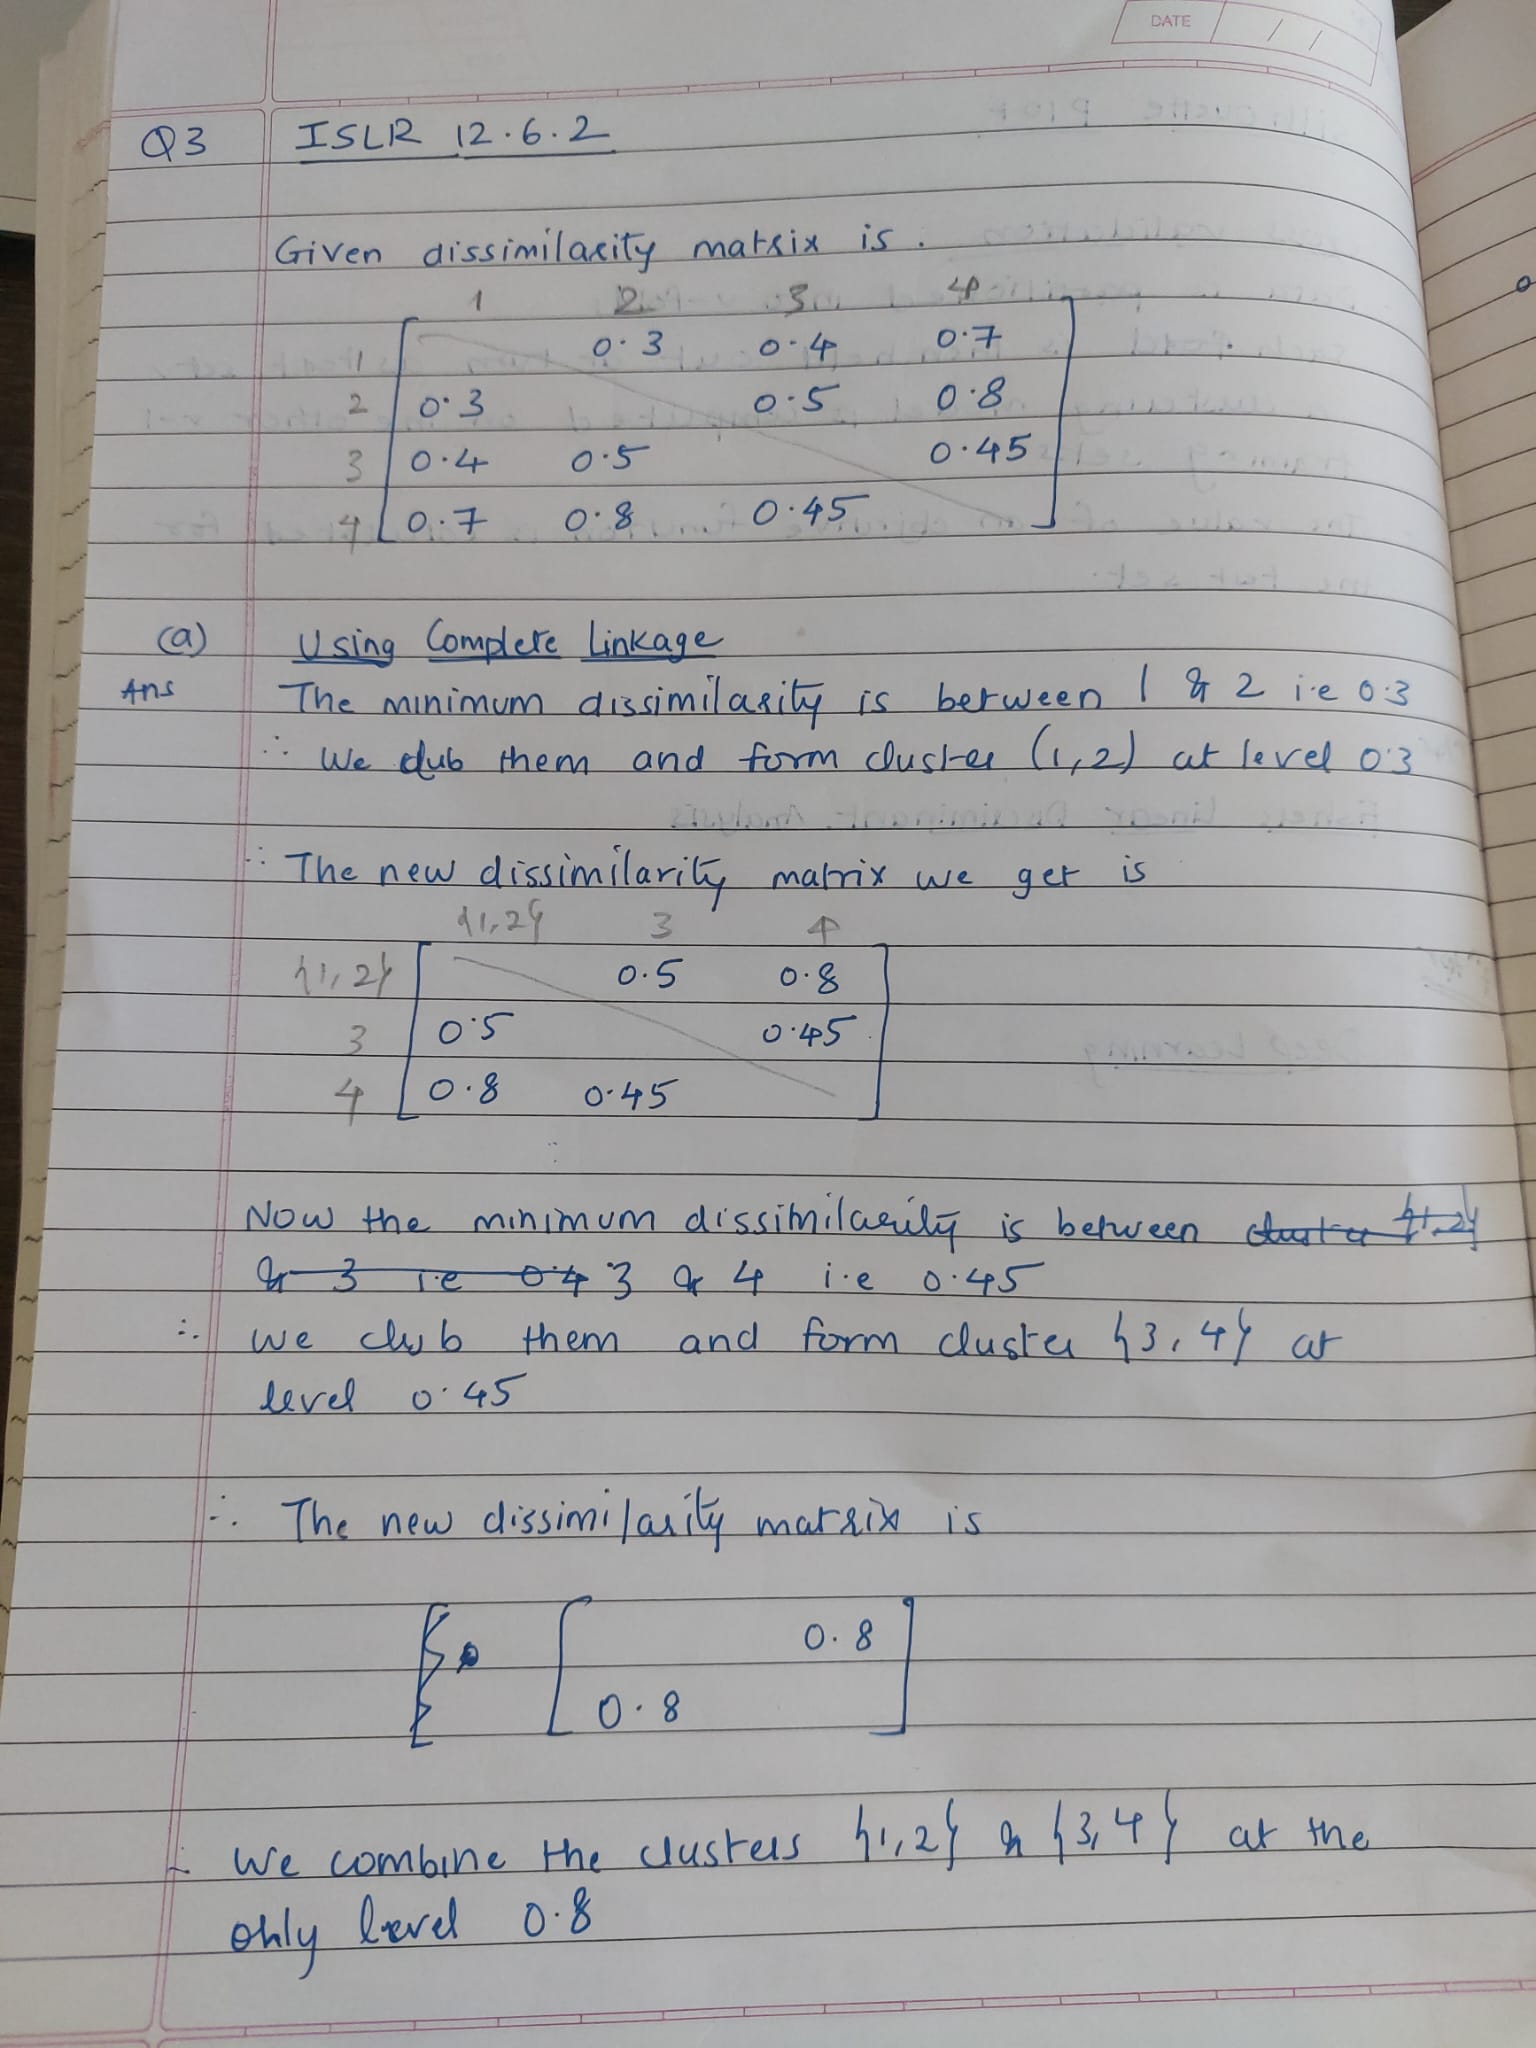

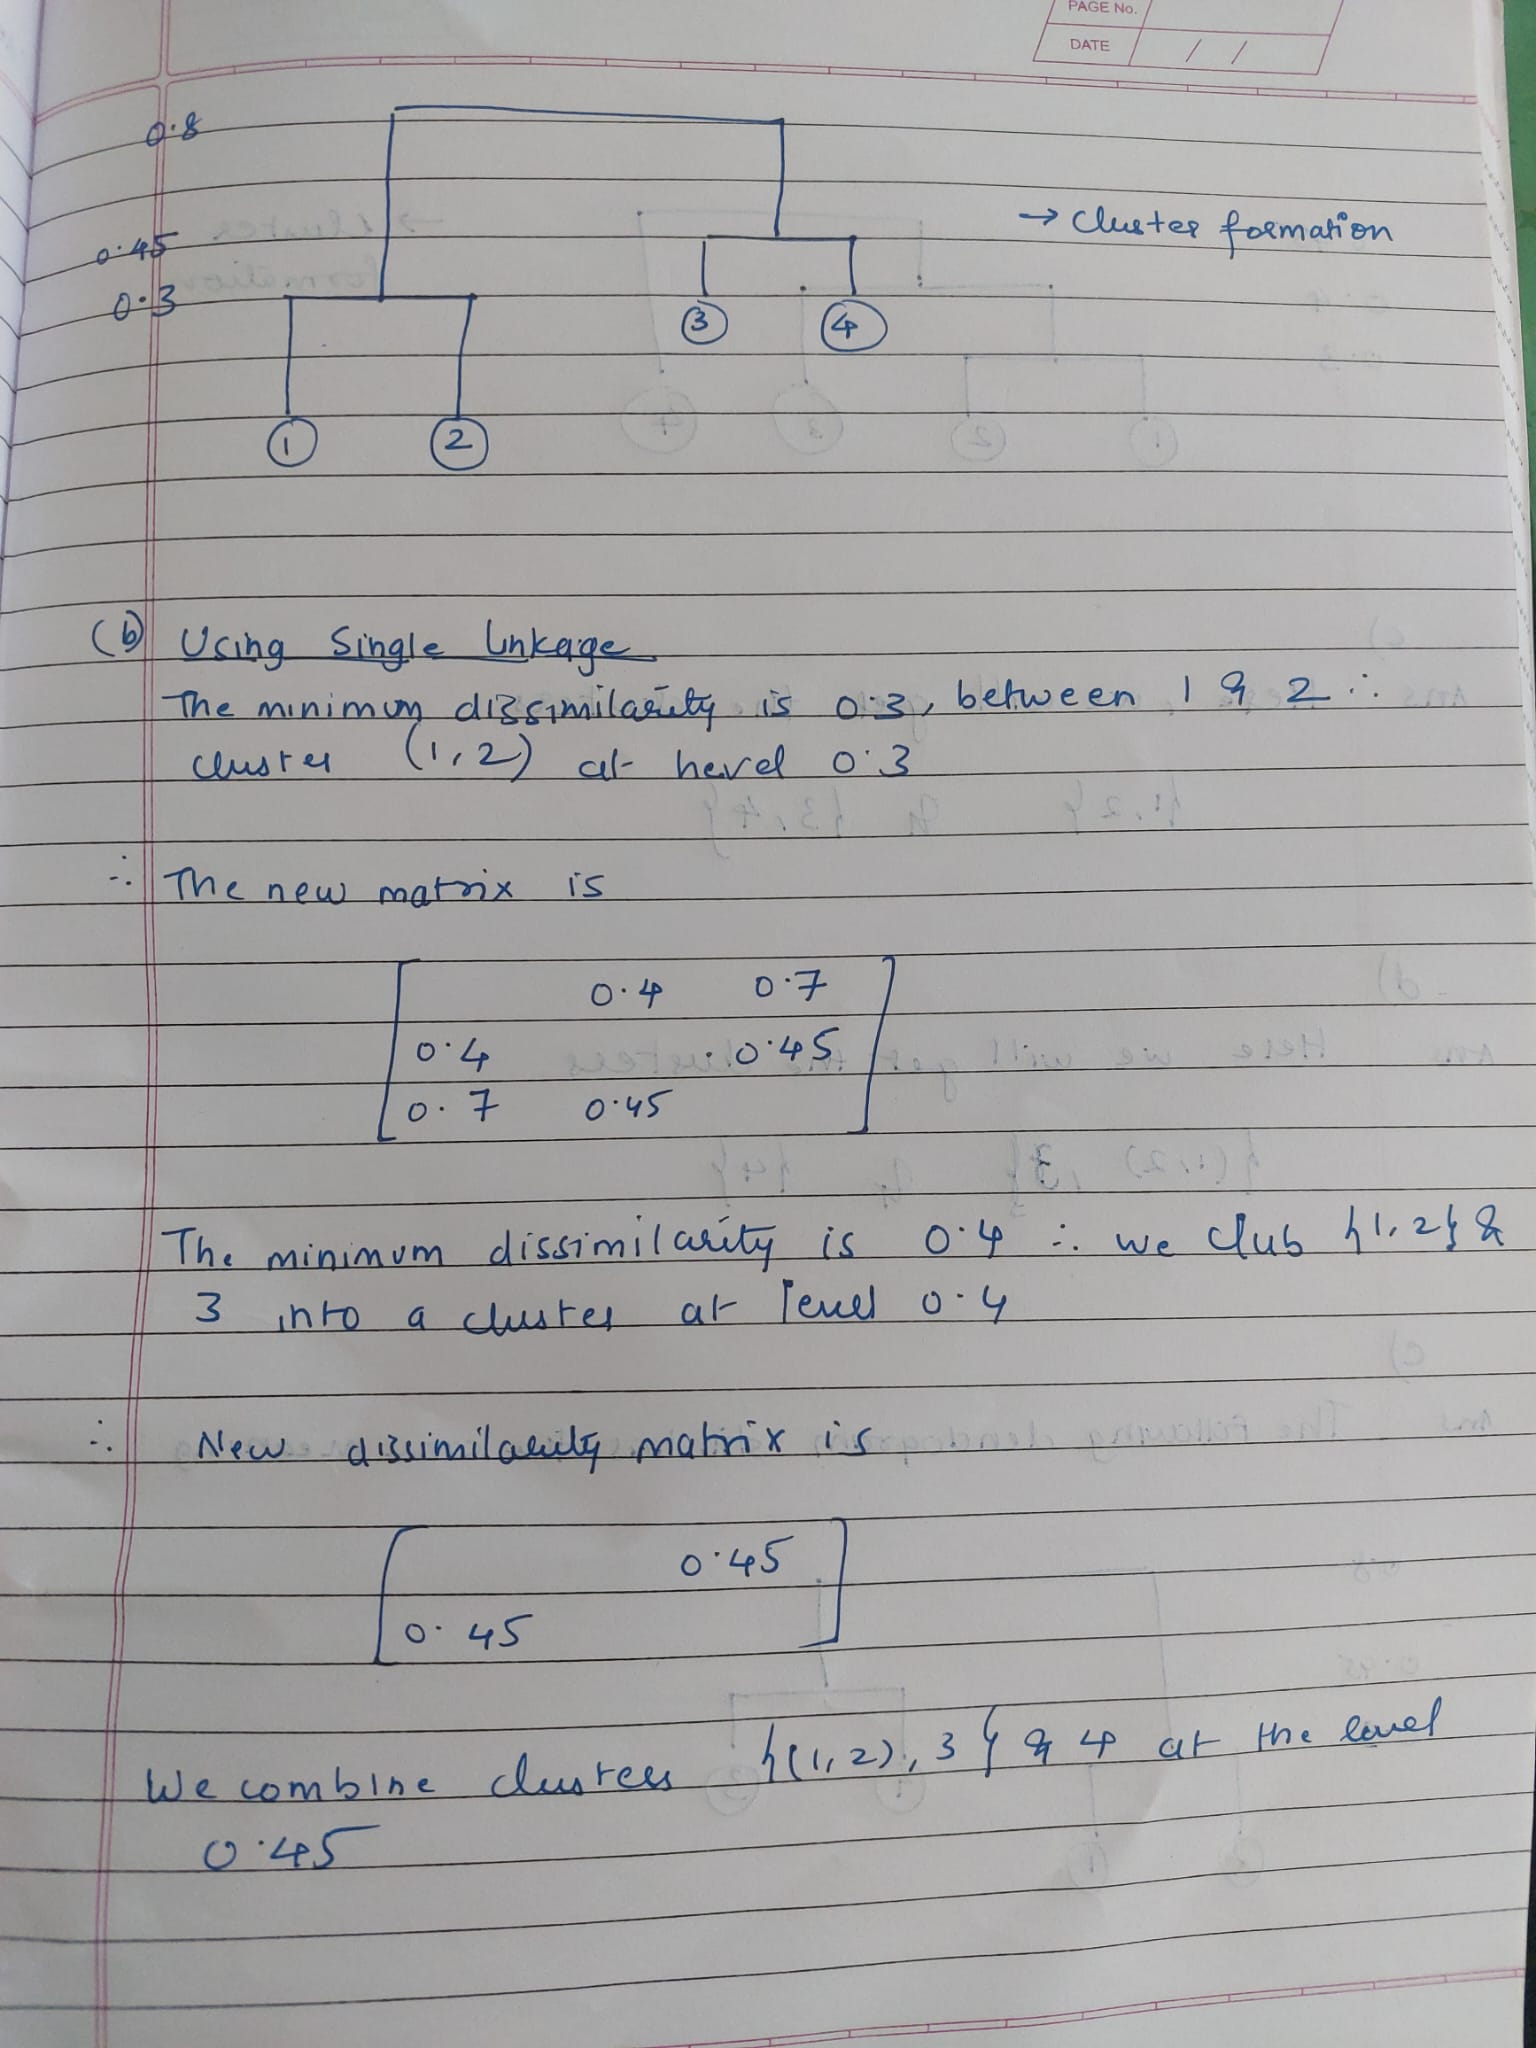

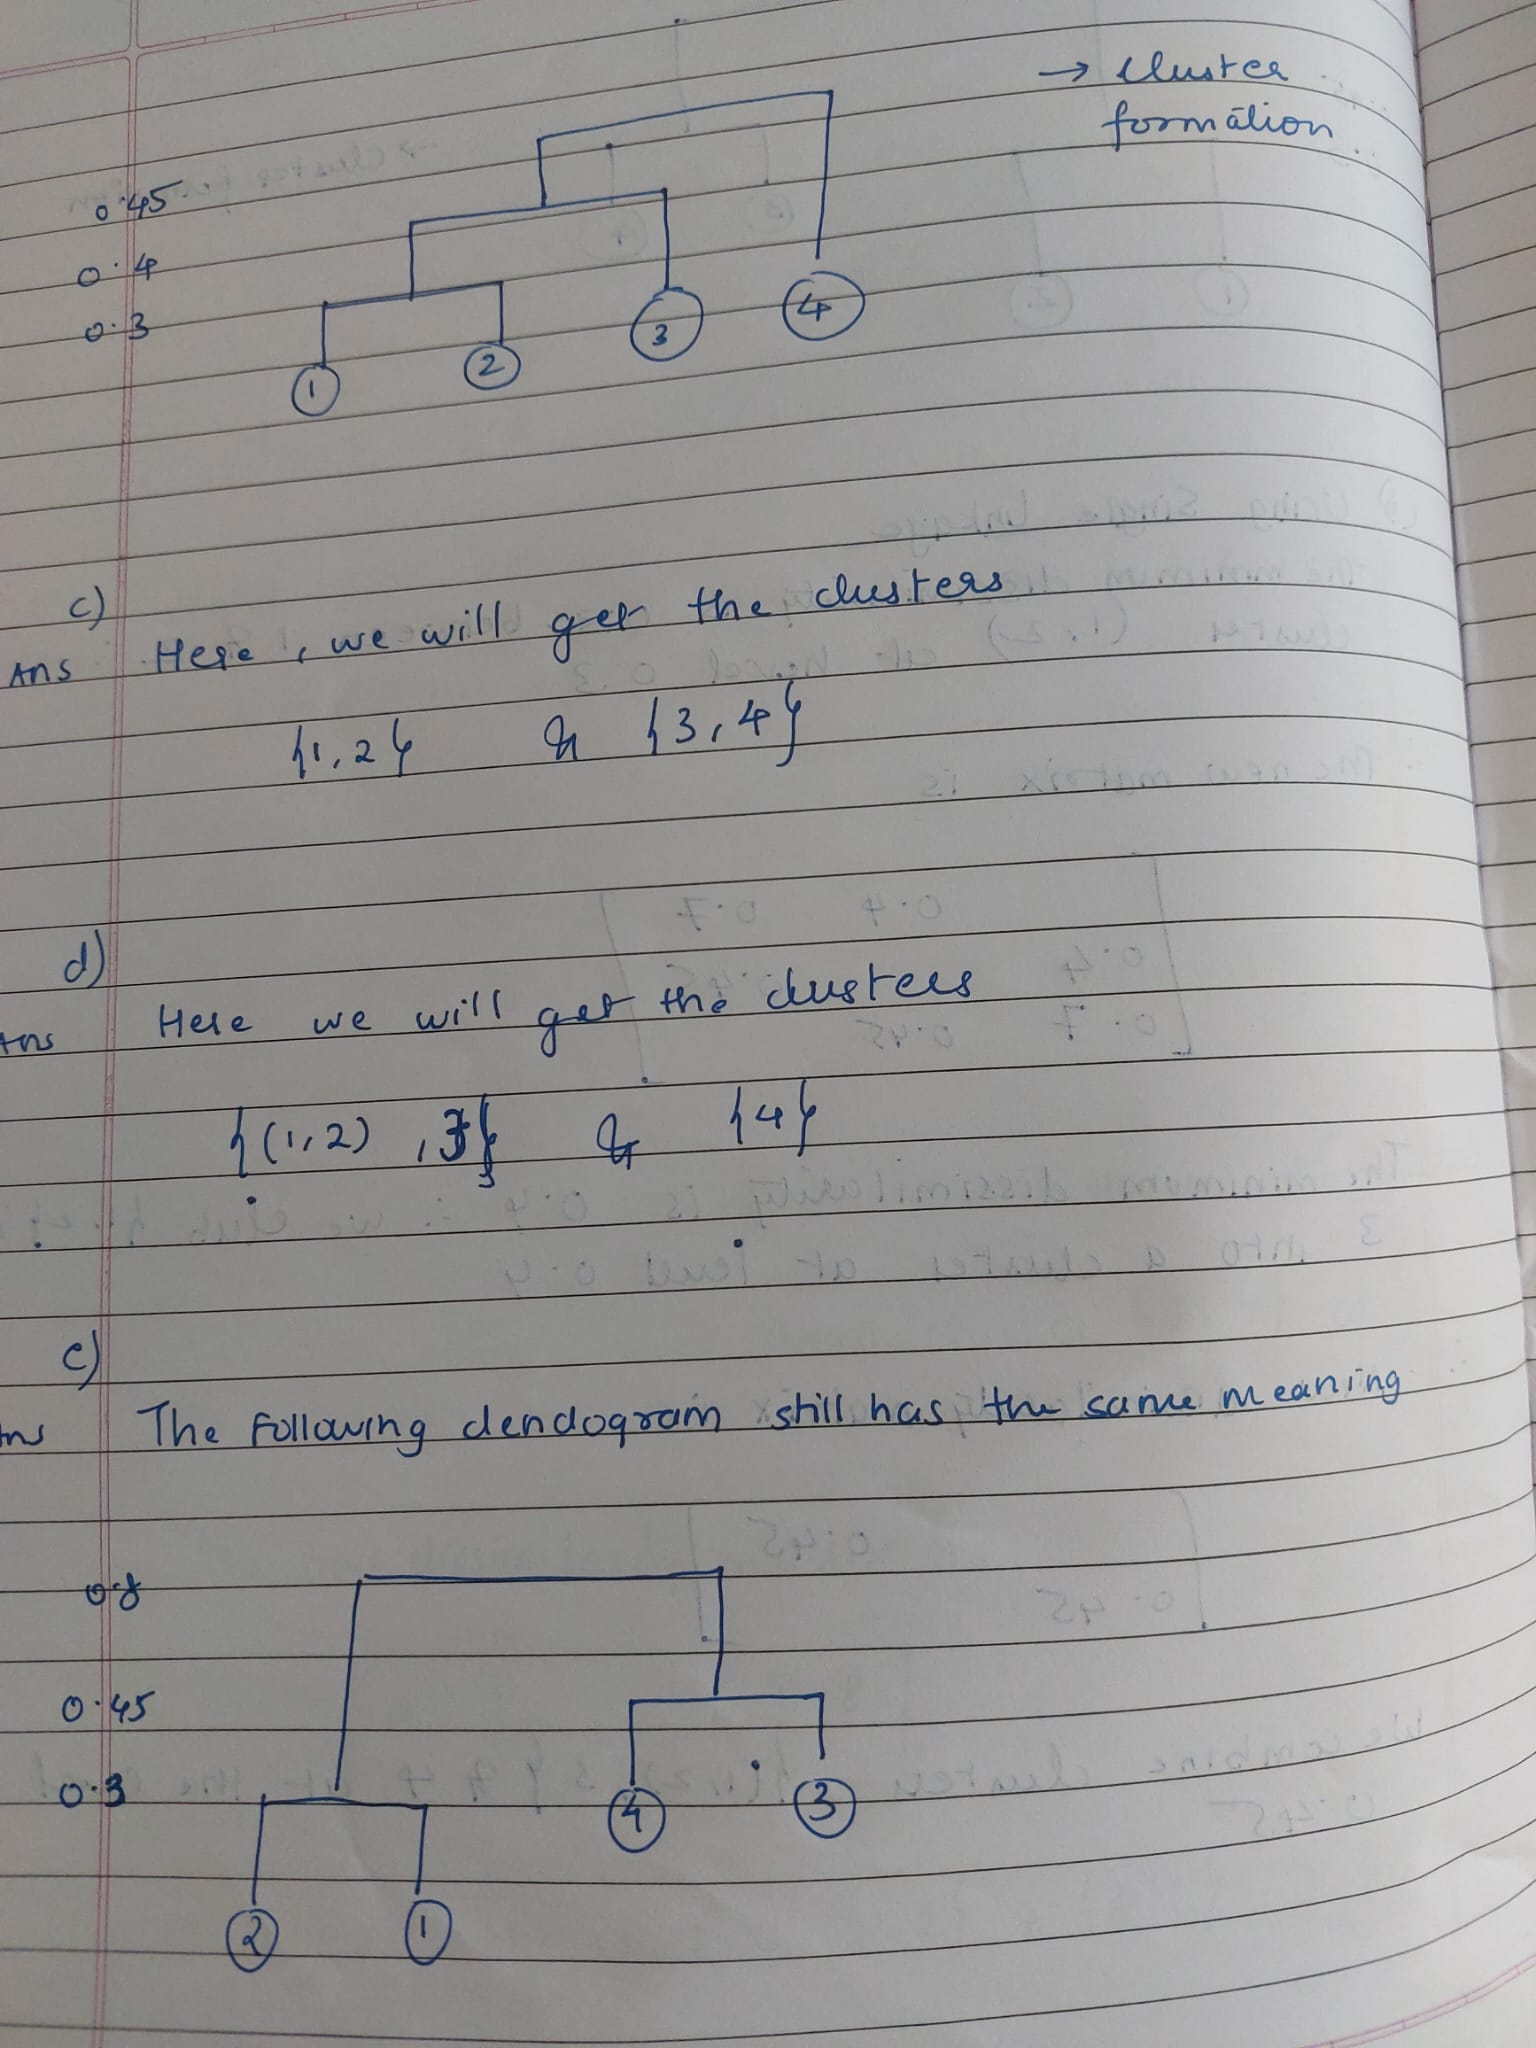

In [75]:
print(d)
print(sum(d)/len(d))

[0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360667129951356, 0.22918693537178597, 0.2444753300903405, 0.19360